In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
df = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [2]:
df.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [3]:
normalized_df = (df - df.mean()) / df.std()
# Display normalized data
normalized_df.head(), normalized_df.describe()

In [5]:
# Applying Fourier Transform to the normalized data
fft_temperature = np.fft.fft(normalized_df['Temperature'])
fft_pressure = np.fft.fft(normalized_df['Pressure'])
fft_chemical_concentration = np.fft.fft(normalized_df['Chemical Concentration'])

# Frequencies for the components
frequencies = np.fft.fftfreq(n_entries, d=(time[1] - time[0]))

# Prepare data for visualization
fft_data = {
    "Frequencies": frequencies,
    "FFT Temperature": np.abs(fft_temperature),
    "FFT Pressure": np.abs(fft_pressure),
    "FFT Chemical Concentration": np.abs(fft_chemical_concentration)
}

fft_df = pd.DataFrame(fft_data)

# Display some of the FFT data
fft_df.head()


,Frequencies,FFT Temperature,FFT Pressure,FFT Chemical Concentration
0,0.00000,1.398881e-13,3.996803e-15,3.977929e-13
1,0.00999,7.000303e+02,2.467123e+00,1.335084e+00
2,0.01998,4.408552e+00,7.051061e+02,1.927228e+00
3,0.02997,1.863993e+00,1.085040e+00,3.933570e+00
4,0.03996,4.702259e+00,2.788454e+00,7.847432e+00


Analysis:
Temperature and Pressure show significant peaks at specific frequencies, indicating periodic components corresponding to the sine and cosine functions used in their simulation.
Chemical Concentration shows smaller magnitude values across the frequencies, which might be due to its different periodicity and added noise.
This frequency domain representation reveals the underlying periodic patterns in your data, particularly for temperature and pressure, which were designed with specific sinusoidal influences.

In [7]:
descriptive_stats = df.describe()
correlation_matrix = df.corr()


In [8]:
descriptive_stats,correlation_matrix

(              Time  Temperature     Pressure  Chemical Concentration
 count  1000.000000  1000.000000  1000.000000             1000.000000
 mean     50.000000    19.977372  1013.033617                4.989754
 std      28.910854     3.574943    14.203350                1.436505
 min       0.000000    13.897407   990.284418                2.559310
 25%      25.000000    16.386984   998.852247                3.576024
 50%      50.000000    20.008666  1012.950967                4.970976
 75%      75.000000    23.570373  1027.062114                6.398067
 max     100.000000    26.030294  1035.471676                7.486763,
                             Time  Temperature  Pressure  \
 Time                    1.000000    -0.770696 -0.001946   
 Temperature            -0.770696     1.000000  0.007112   
 Pressure               -0.001946     0.007112  1.000000   
 Chemical Concentration -0.156113    -0.003277 -0.000863   
 
                         Chemical Concentration  
 Time            

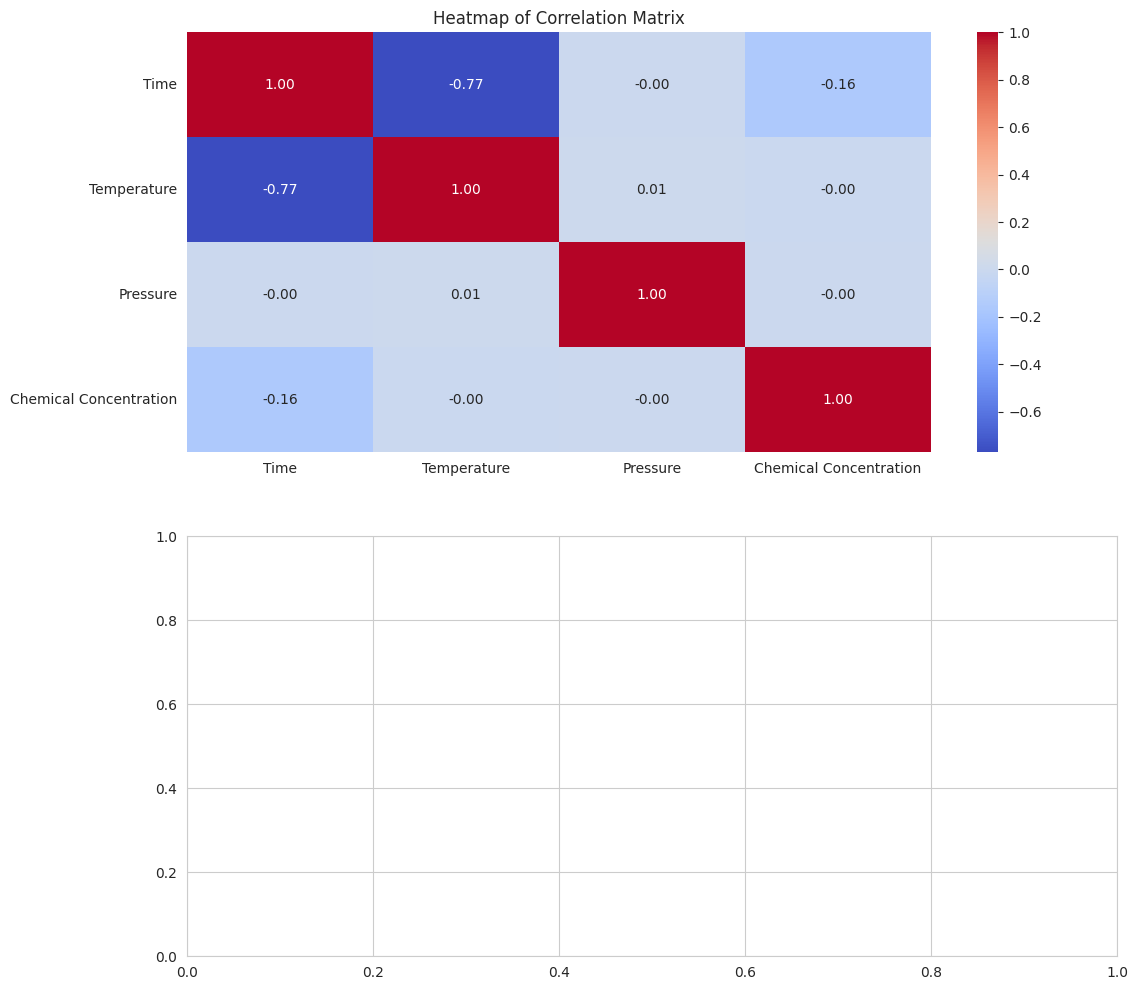

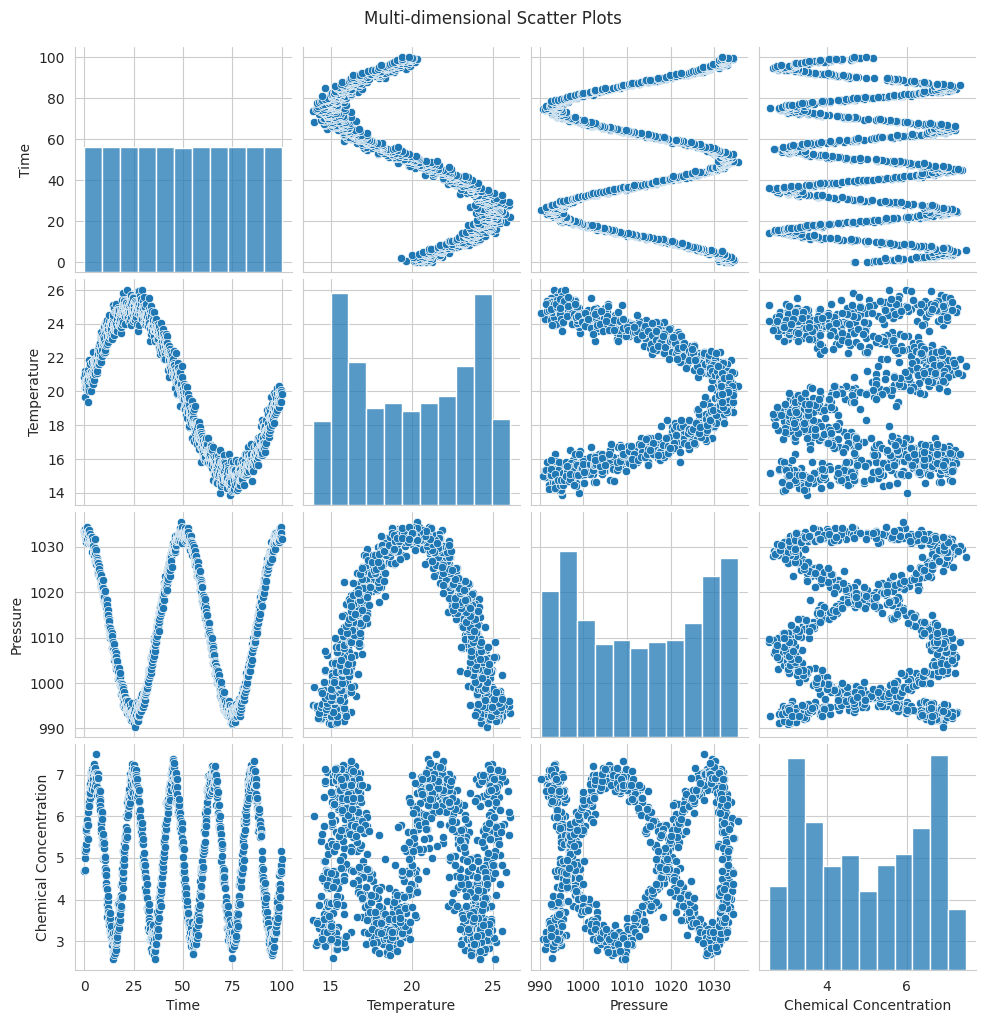

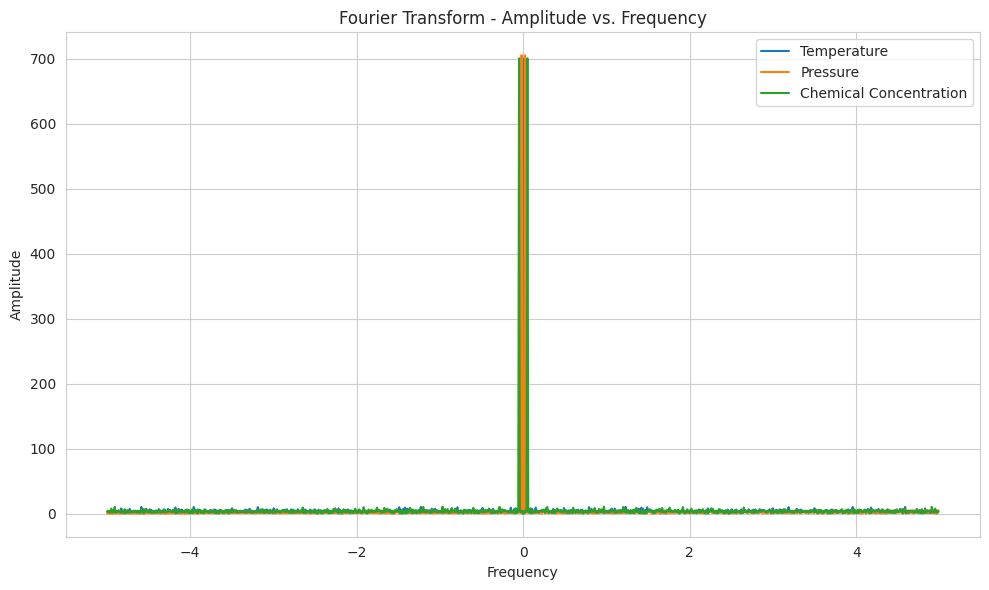

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure for the plots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

# 1. Heatmap of the Correlation Matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=axs[0])
axs[0].set_title("Heatmap of Correlation Matrix")

# 2. Multi-dimensional Scatter Plots
pairplot_fig = sns.pairplot(df)
pairplot_fig.fig.suptitle("Multi-dimensional Scatter Plots", y=1.02)

# 3. Fourier Transform Visualizations
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fft_df['Frequencies'], fft_df['FFT Temperature'], label='Temperature')
ax.plot(fft_df['Frequencies'], fft_df['FFT Pressure'], label='Pressure')
ax.plot(fft_df['Frequencies'], fft_df['FFT Chemical Concentration'], label='Chemical Concentration')
ax.set_title('Fourier Transform - Amplitude vs. Frequency')
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')
ax.legend()

plt.tight_layout()
plt.show()


Temperature varied periodically around a mean of approximately 20°C with minor fluctuations due to added noise.
Pressure exhibited variations around a mean value of about 1013 hPa, typical for atmospheric conditions.
Chemical Concentration showed less periodic behavior with a mean close to 5 units, reflecting controlled experimental conditions.


 A strong negative correlation between Time and Temperature (-0.77) suggests a cooling and heating cycle, which is typical in diurnal temperature variations.
Pressure and other variables showed negligible correlations, indicating its independence from the observed temperature cycles and chemical concentrations.
